In [30]:
import pandas as pd
import mysql.connector as connector

In [31]:
connection = connector.connect(
    host="localhost",
    port="3306",
    user="root",
    password="Admin",
    database="world"
)

In [32]:
try:
    df_city = pd.read_sql("SELECT * FROM city;", connection)
    df_country = pd.read_sql("SELECT * FROM country;", connection)
    df_countrylanguage = pd.read_sql("SELECT * FROM countrylanguage;", connection)
except Exception as e:
    print(str(e))
finally:
    connection.close()
    

C:\Users\migue\AppData\Local\Temp\ipykernel_13480\889727161.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_city = pd.read_sql("SELECT * FROM city;", connection)
C:\Users\migue\AppData\Local\Temp\ipykernel_13480\889727161.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_country = pd.read_sql("SELECT * FROM country;", connection)
C:\Users\migue\AppData\Local\Temp\ipykernel_13480\889727161.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_countrylanguage = pd.read_sql("SELECT * FROM countrylanguage;", connec

In [33]:
df_city.head()


,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [34]:
df_country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [35]:
df_countrylanguage.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


# MOSTRAS LAS 10 CIUDADES CON MAYOR POBLACION

In [36]:
df_city.sort_values('Population', ascending=False).head(10)

,ID,Name,CountryCode,District,Population
1023,1024,Mumbai (Bombay),IND,Maharashtra,10500000
2330,2331,Seoul,KOR,Seoul,9981619
205,206,São Paulo,BRA,São Paulo,9968485
1889,1890,Shanghai,CHN,Shanghai,9696300
938,939,Jakarta,IDN,Jakarta Raya,9604900
2821,2822,Karachi,PAK,Sindh,9269265
3356,3357,Istanbul,TUR,Istanbul,8787958
2514,2515,Ciudad de México,MEX,Distrito Federal,8591309
3579,3580,Moscow,RUS,Moscow (City),8389200
3792,3793,New York,USA,New York,8008278


In [ ]:
df_city_top_10 = df_city.sort_values('Population', ascending=False).iloc[:10]
df_city_top_10.plot(kind='bar', x='Distric', y='Population', rot=45)

<Axes: xlabel='Name'>

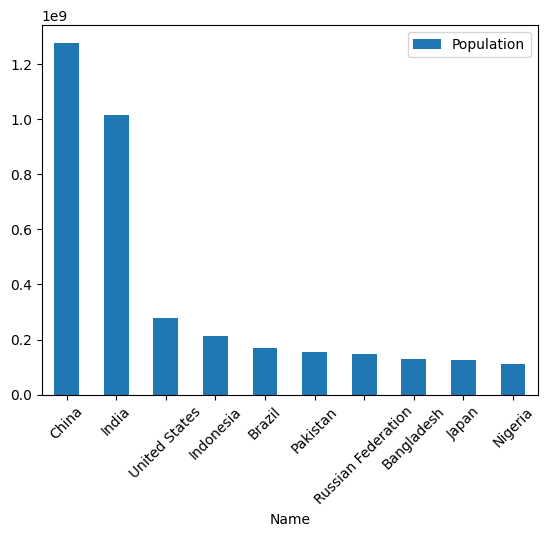

In [38]:
df_city_top_10 = df_country.sort_values('Population', ascending=False).iloc[:10]

df_city_top_10.plot(kind='bar', x='Name', y='Population', rot=45)

# MOSTRAR LA POBLACION TOTAL POR CONTINENTE

In [43]:
df_country.groupby('Continent')['Population'].sum()

Continent
Africa            784475000
Antarctica                0
Asia             3705025700
Europe            730074600
North America     482993000
Oceania            30401150
South America     345780000
Name: Population, dtype: int64

In [45]:
df_population_by_continent = df_country.groupby('Continent')['Population'].sum()
df_population_by_continent = pd.DataFrame(df_population_by_continent)
df_population_by_continent

,Population
Continent,
Africa,784475000
Antarctica,0
Asia,3705025700
Europe,730074600
North America,482993000
Oceania,30401150
South America,345780000


In [46]:
df_population_by_continent = df_country.groupby('Continent')['Population'].sum()
df_population_by_continent = pd.DataFrame(df_population_by_continent)
df_population_by_continent.reset_index(inplace=True)
df_population_by_continent

,Continent,Population
0,Africa,784475000
1,Antarctica,0
2,Asia,3705025700
3,Europe,730074600
4,North America,482993000
5,Oceania,30401150
6,South America,345780000


In [52]:
population_by_continent = df_country.groupby('Continent')['Population'].sum()
df_population_by_continent = pd.DataFrame(population_by_continent)
df_population_by_continent.reset_index(inplace=True)
df_population_by_continent.sort_values('Population', ascending=False)

,Continent,Population
2,Asia,3705025700
0,Africa,784475000
3,Europe,730074600
4,North America,482993000
6,South America,345780000
5,Oceania,30401150
1,Antarctica,0
